## Content:
1. [Multiple roots](#1.-Multiple-roots)
2. [Optimization as a root-finding problem](#2.-Optimization-as-a-root-finding-problem)
3. [Test functions for optimization](#3.-Test-functions-for-optimization)
4. [Selecting an optimiziation method](#4.-Selecting-an-optimization-method)

In [1]:
from IPython.display import Image

## 1. Multiple roots 

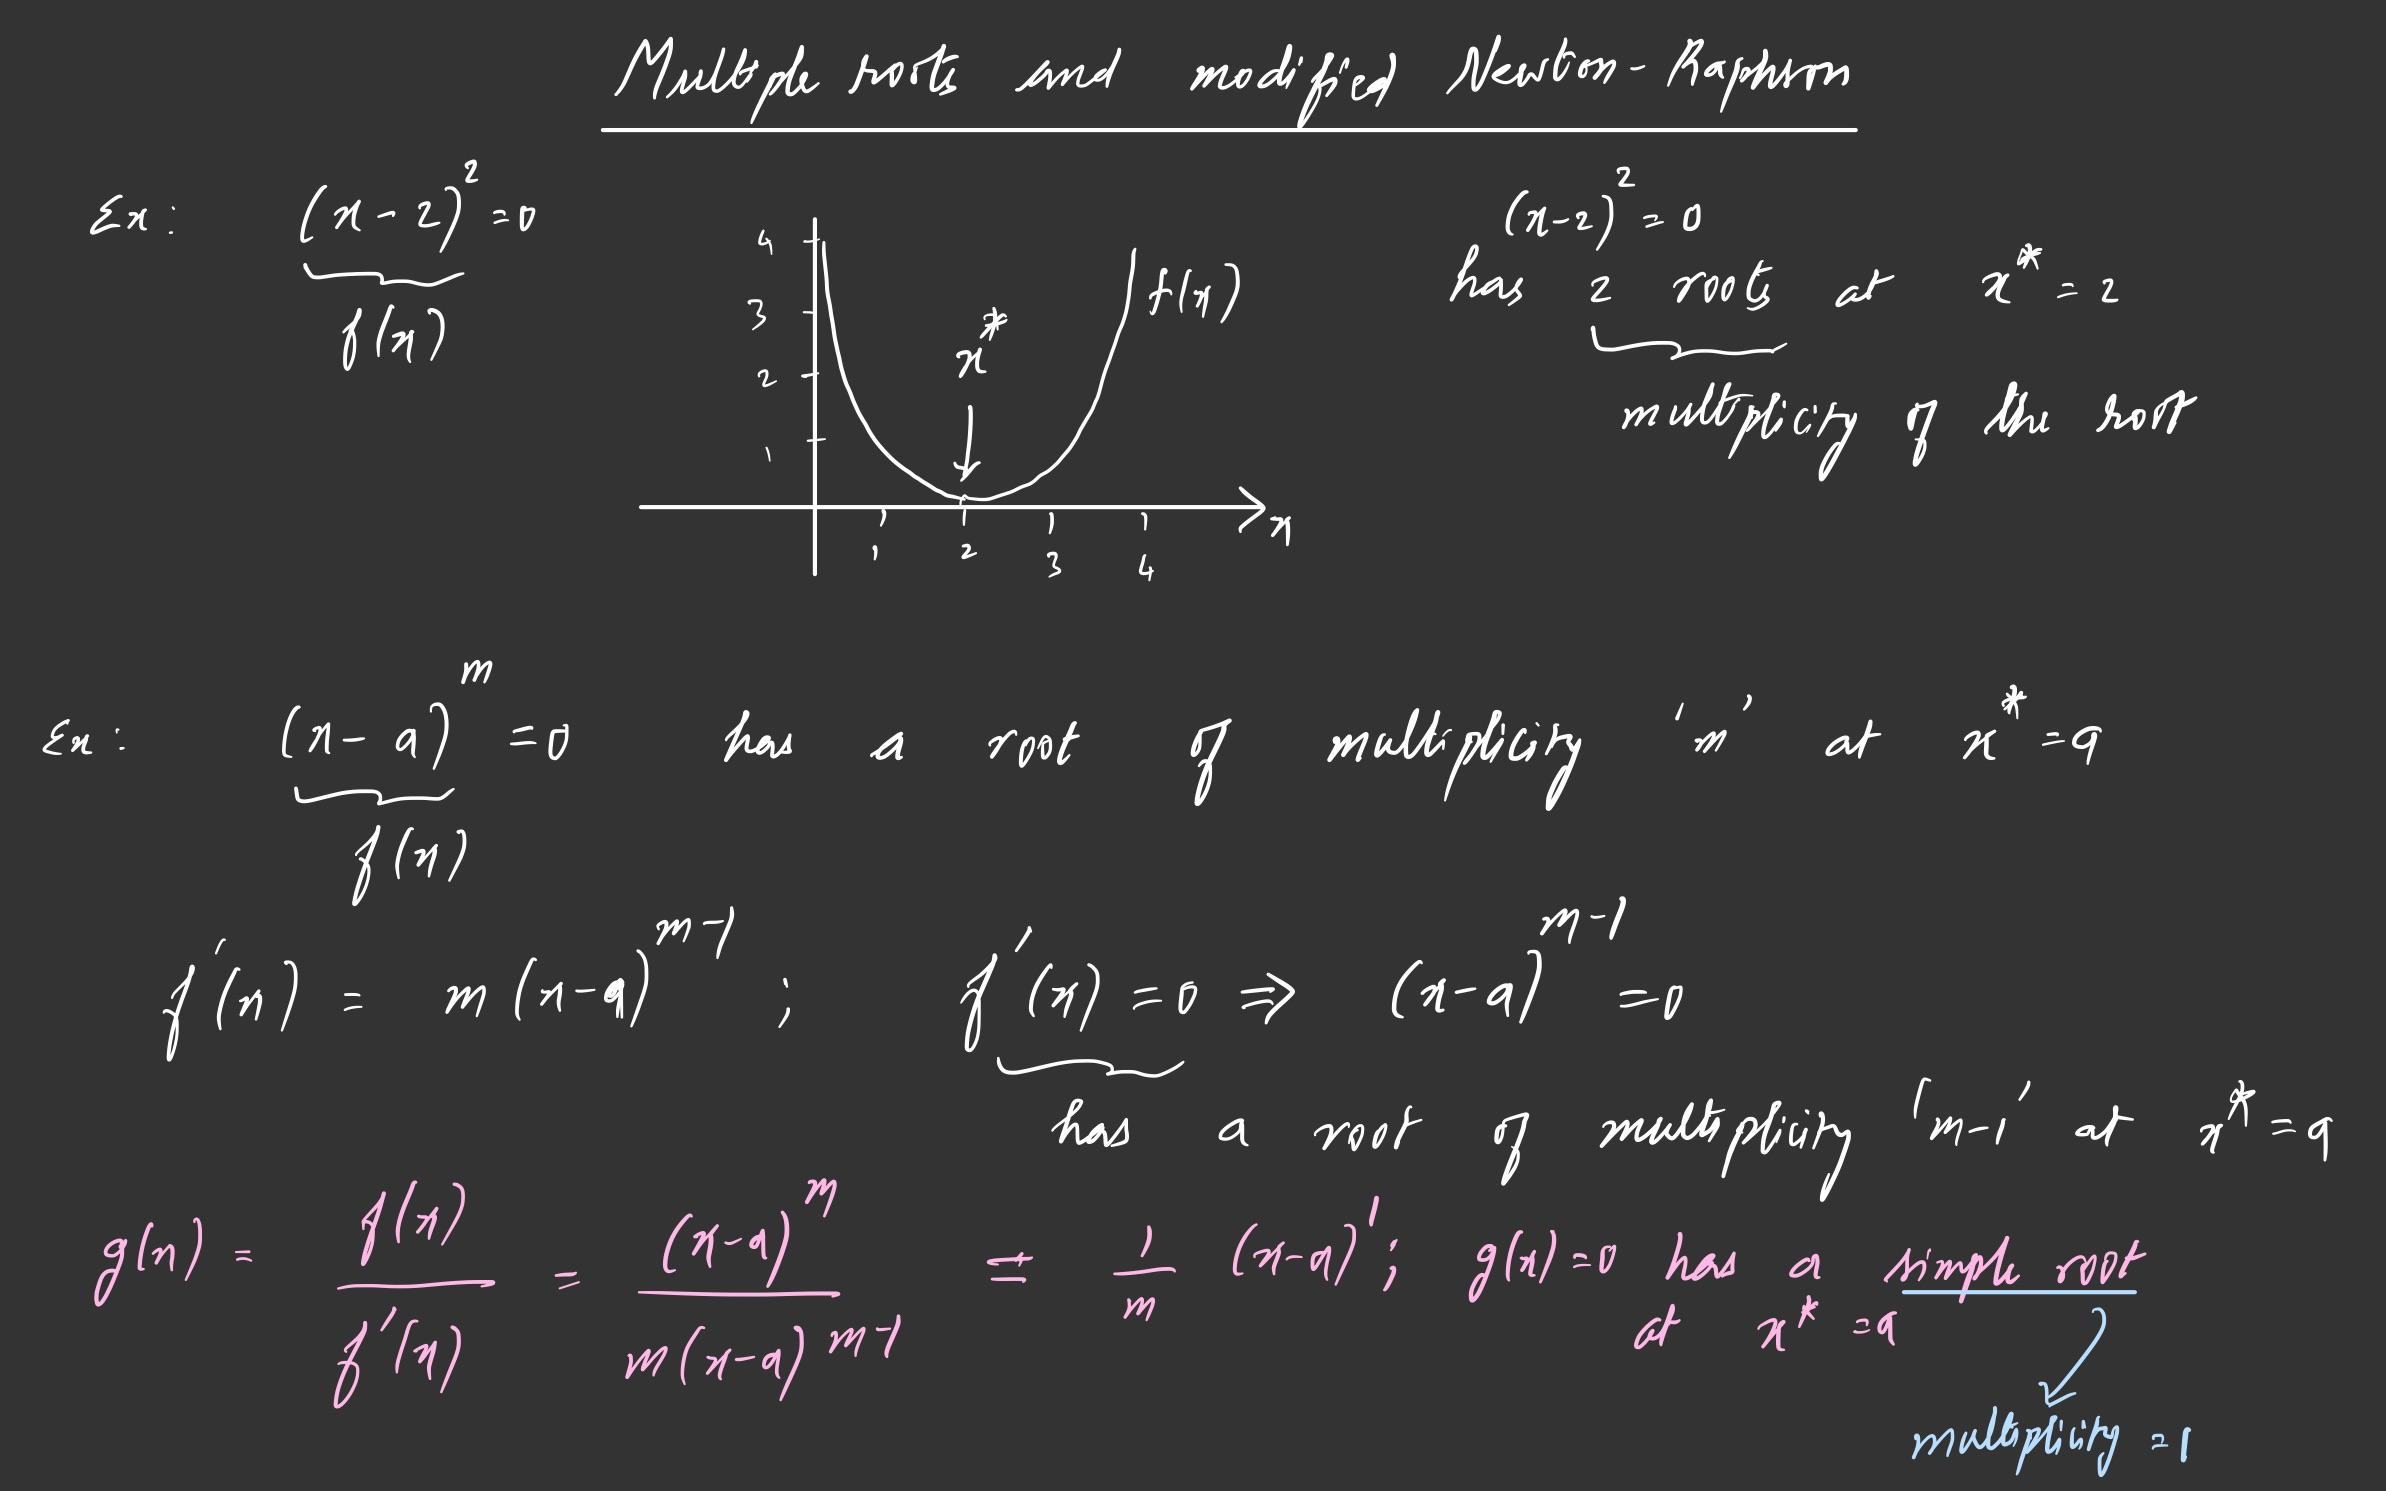

In [2]:
Image(filename='../boardwork/boardwork064.jpg') 

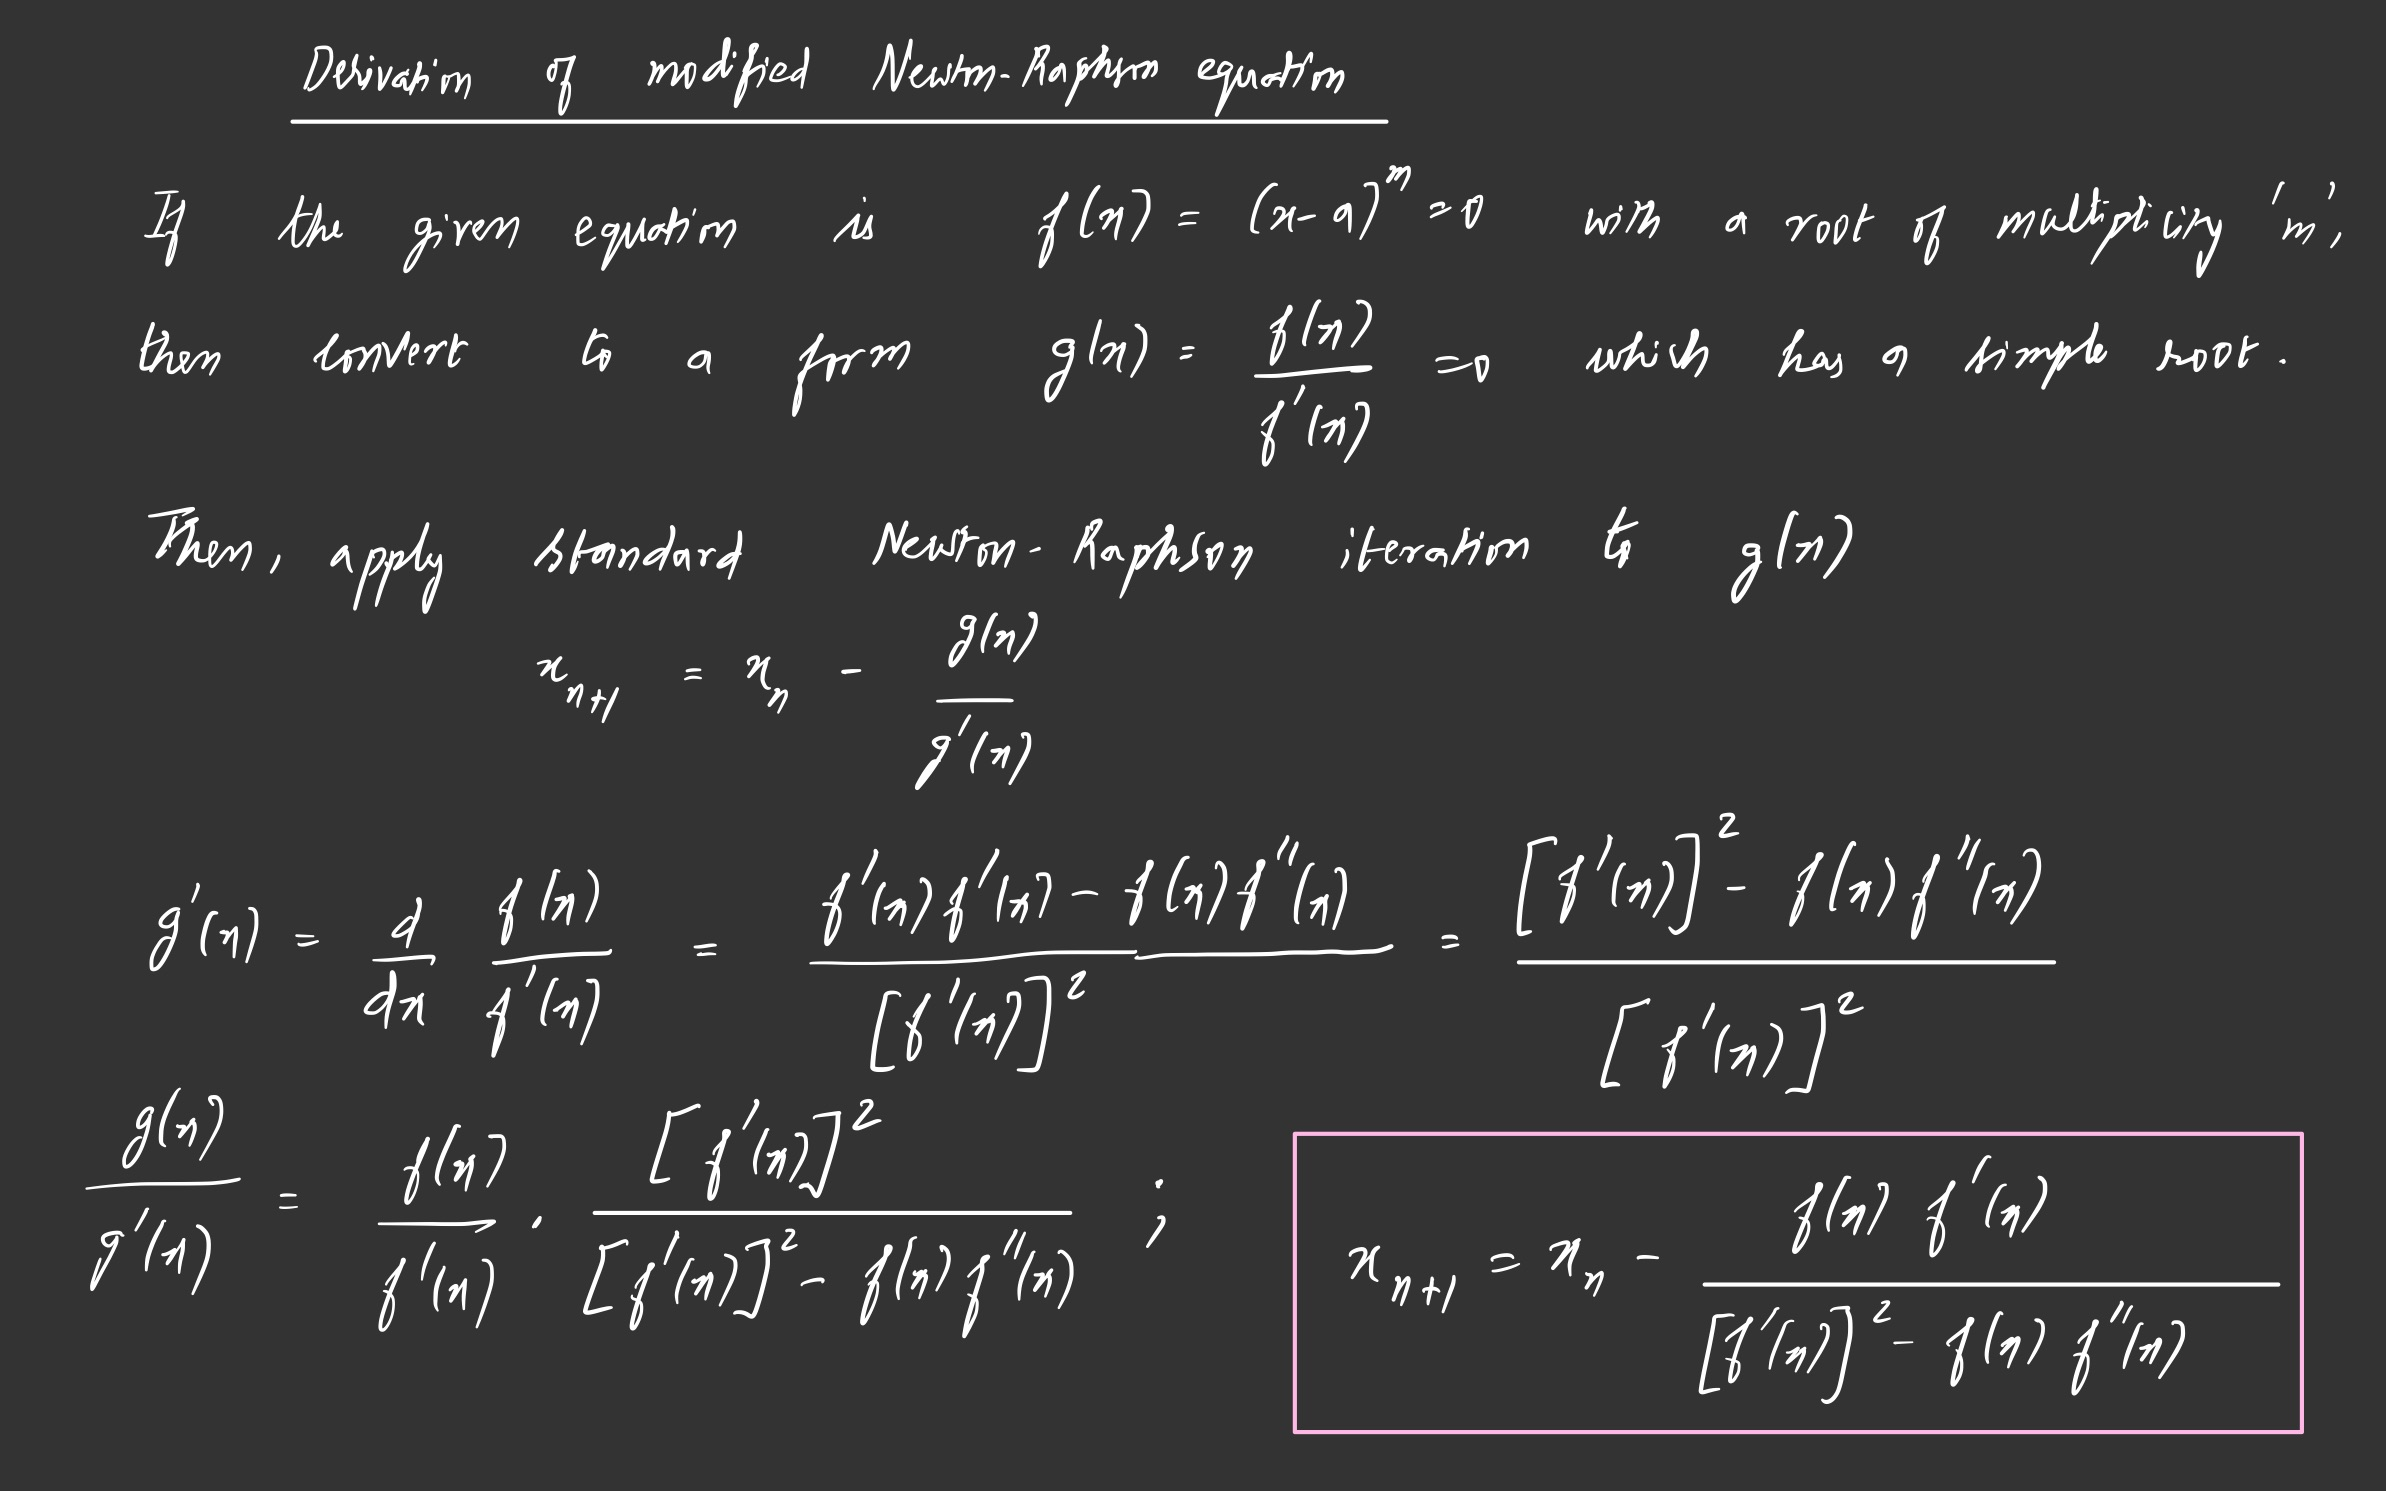

In [3]:
Image(filename='../boardwork/boardwork065.jpg') 

## 2. Optimization as a root-finding problem

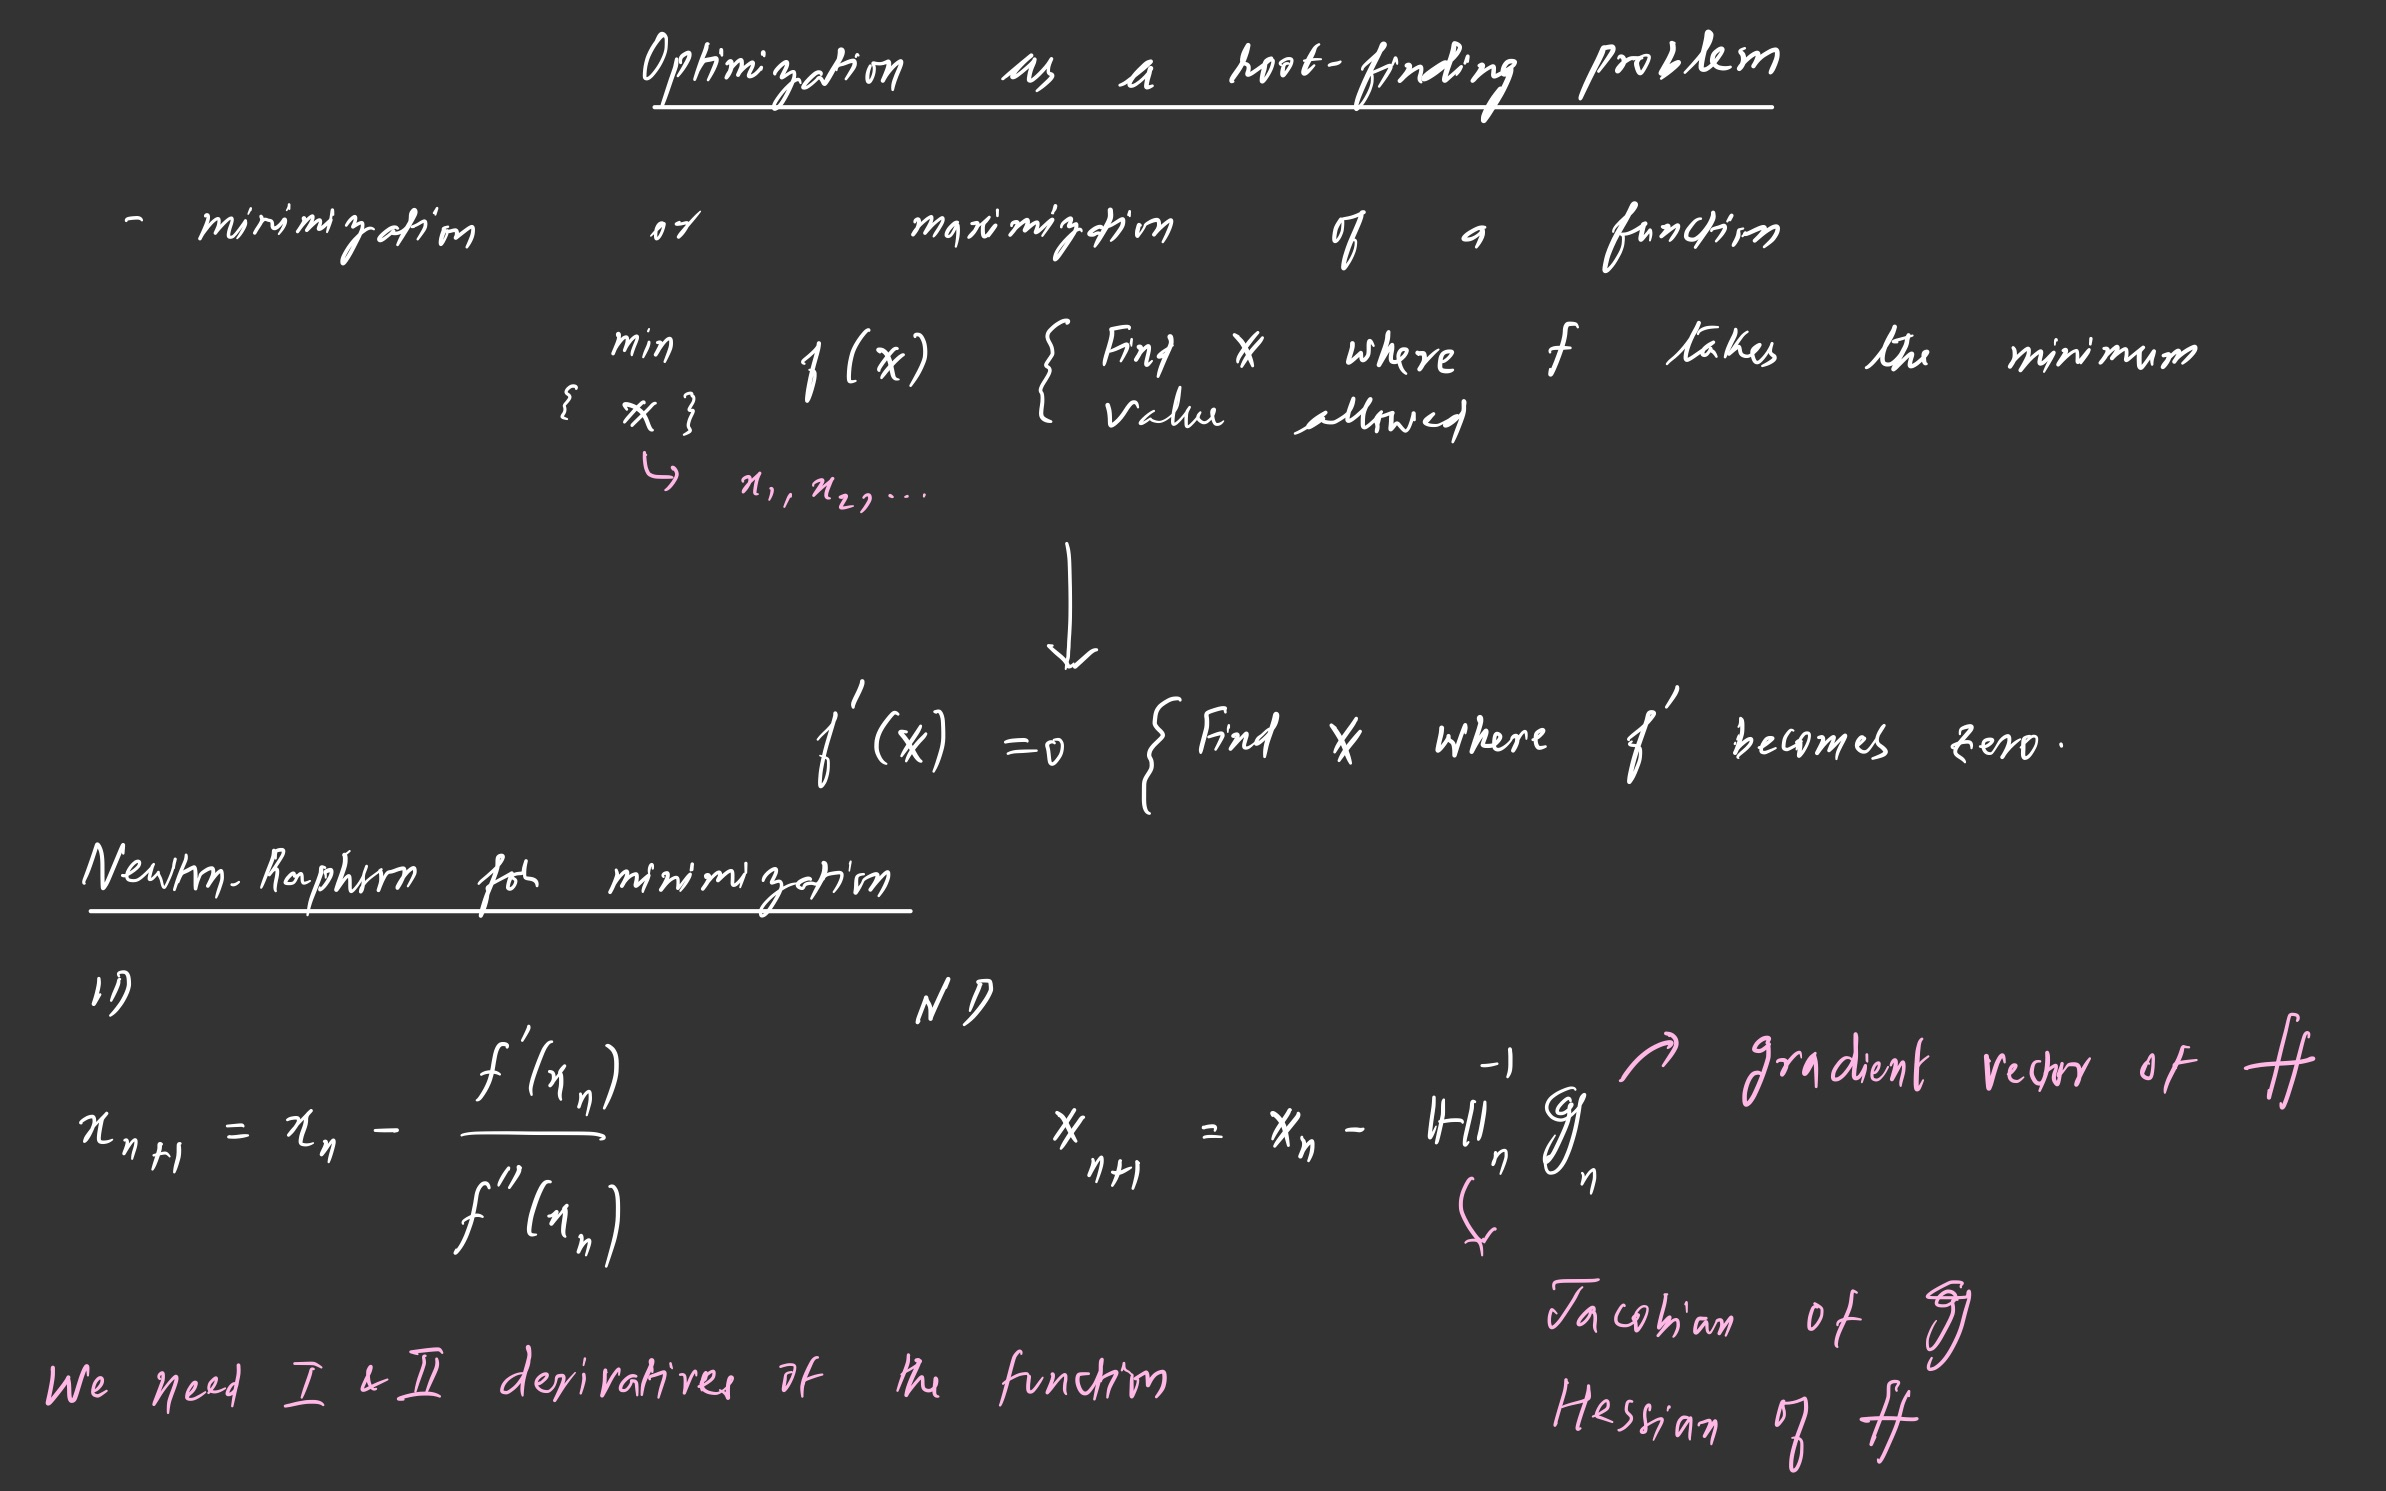

In [4]:
Image(filename='../boardwork/boardwork066.jpg') 

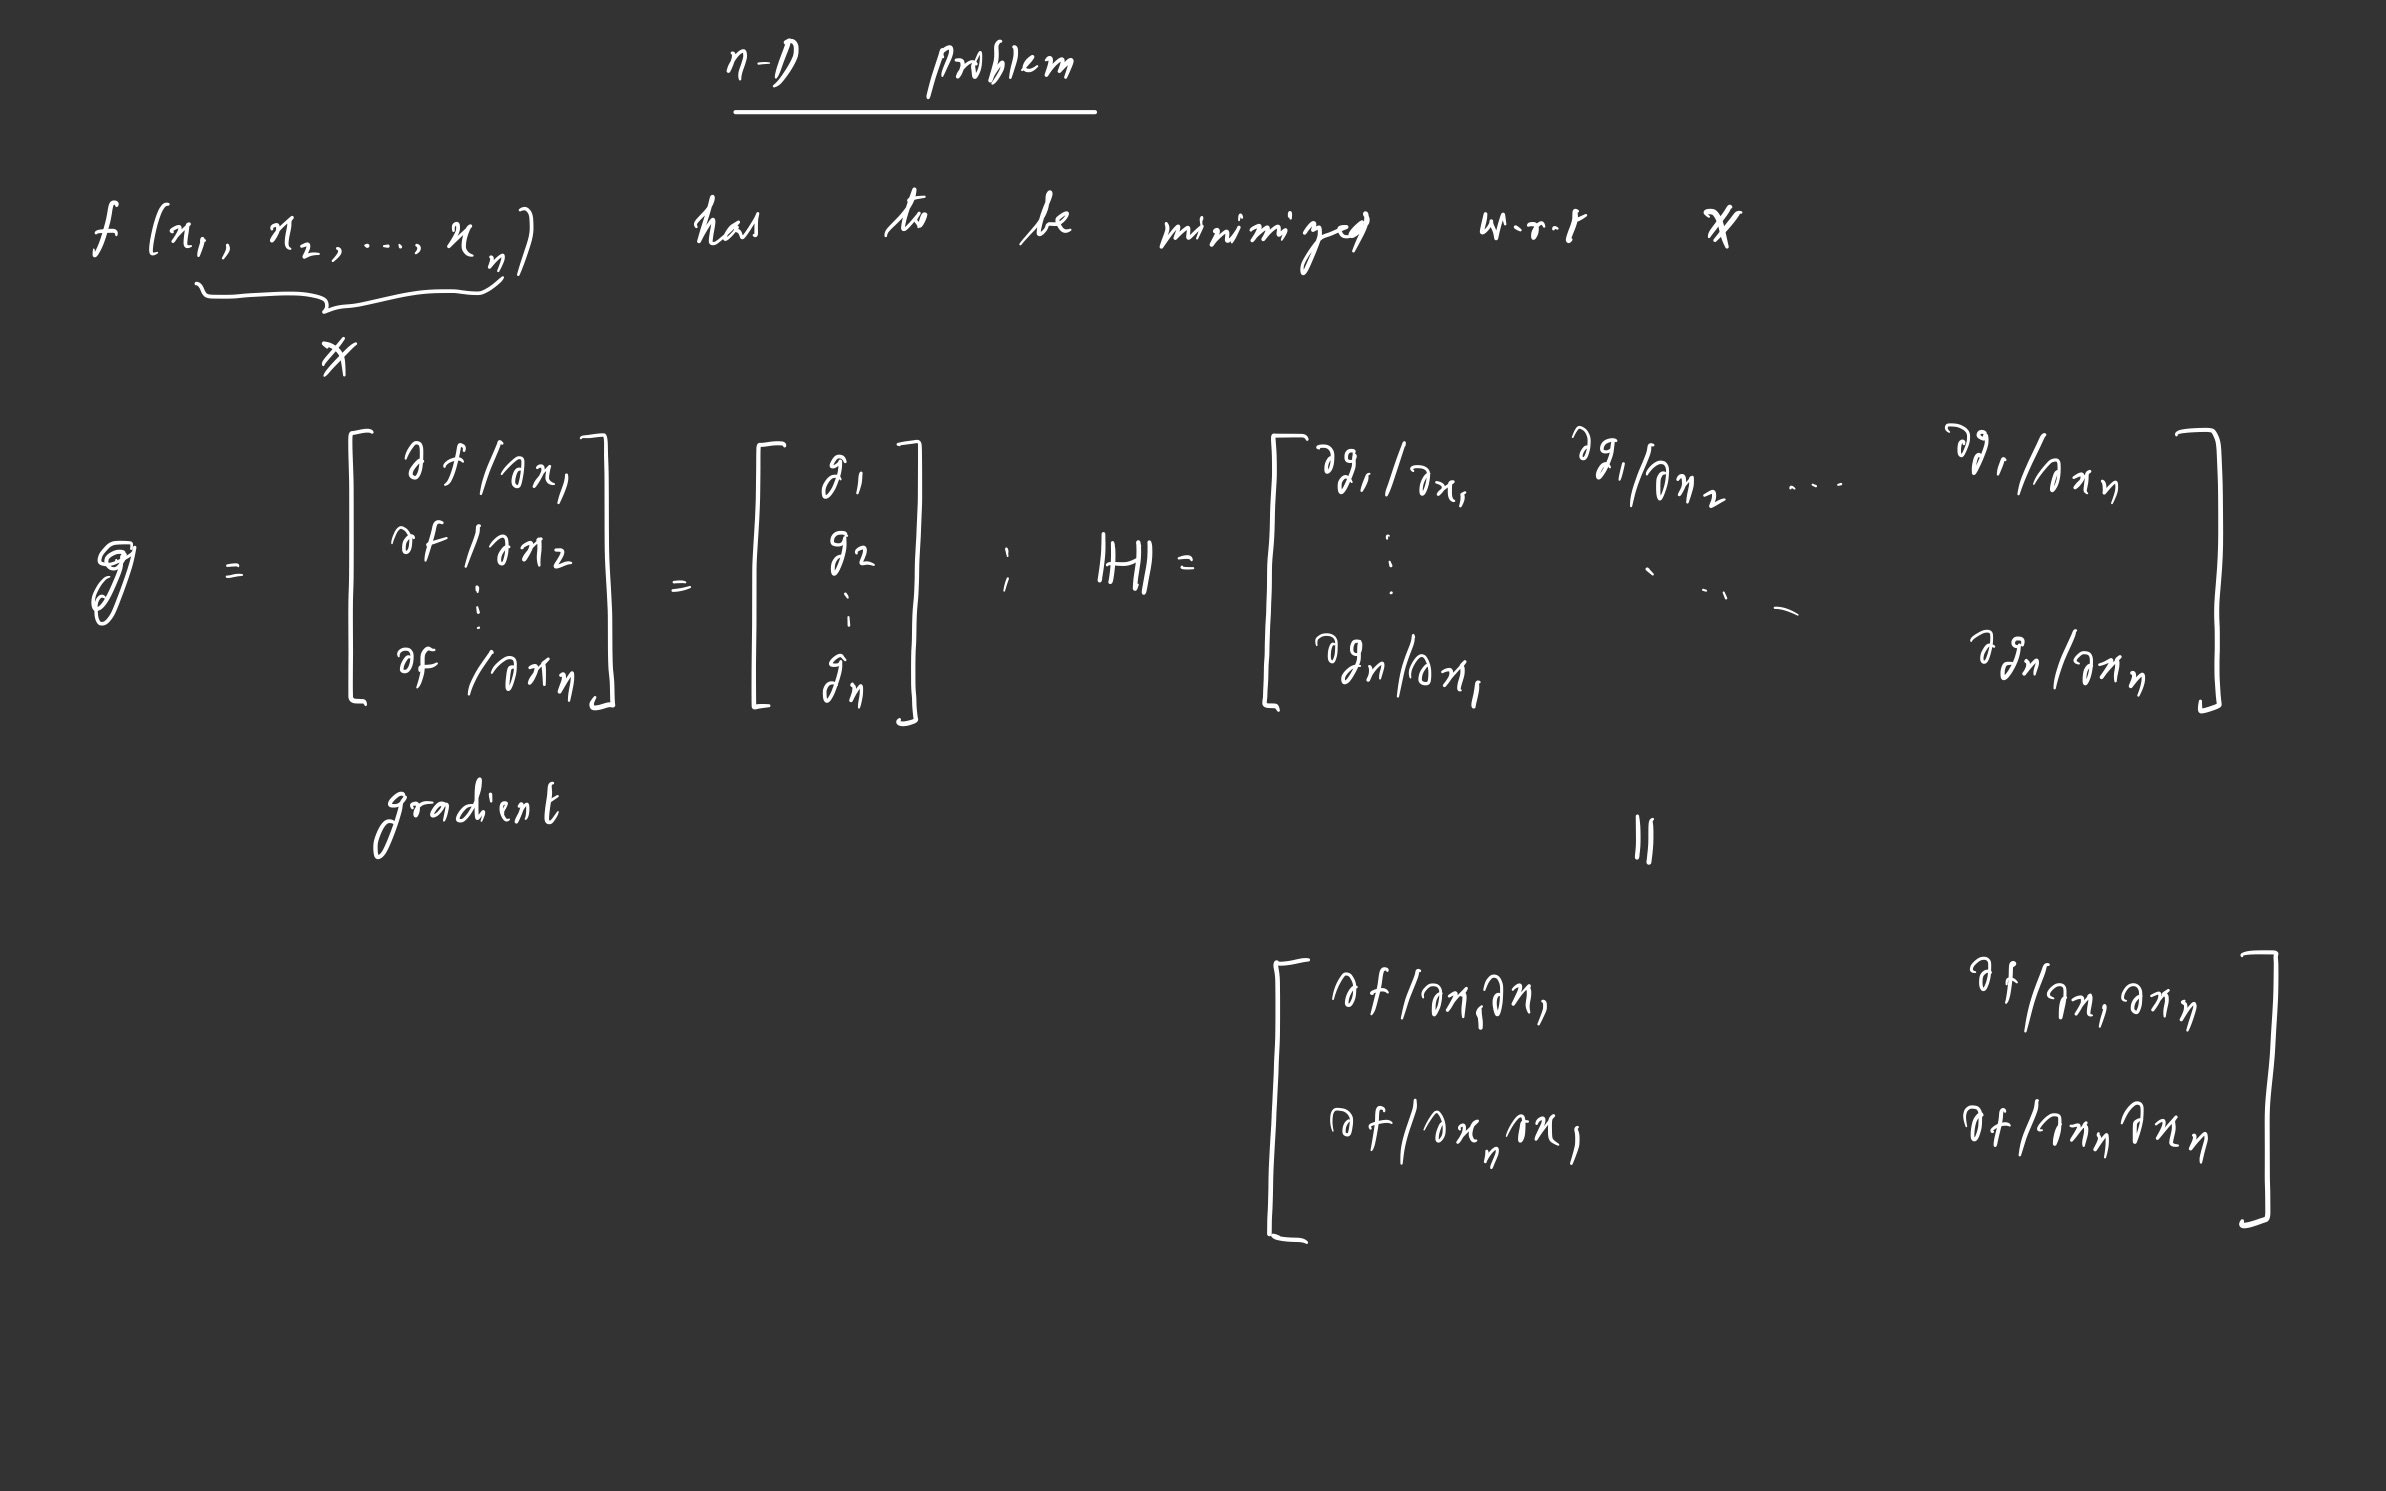

In [5]:
Image(filename='../boardwork/boardwork067.jpg') 

## 3. Test functions for optimization

Wikipedia has a page listing out the test functions used for benchmarking the performance of optimization modules. 

See [https://en.wikipedia.org/wiki/Test_functions_for_optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)

### 3.1 Rosenbrock's banana function.

The [Rosenbrock's function](https://en.wikipedia.org/wiki/Rosenbrock_function) has a global minimum inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.

In [6]:
import numpy as np

# 2D Rosenbrock
def rosenbrock2D(x,y):
    
    a = 1
    b = 100
    
    val = (a-x)**2  + b * (y-x**2.0)**2
    
    return val

In [7]:
x=1; y = 1
print(rosenbrock2D(x,y))

0.0


In [8]:
# 2D Rosenbrock, another way x,y <=> x1,x2
def rosenbrock2D(x1,x2):
    
    a = 1
    b = 100
    
    val = (a-x1)**2  + b * (x2-x1**2.0)**2 
    
    return val

In [9]:
# 3D Rosenbrock
def rosenbrock3D(x1,x2,x3):
    
    a = 1
    b = 100
    
    val = (a-x1)**2  + b * (x2-x1**2.0)**2 + \
          (a-x2)**2  + b * (x3-x2**2.0)**2 
    
    return val

In [10]:
x1=1; x2=1; x3=1
print(rosenbrock3D(x1,x2,x3))

0.0


In [11]:
# nD Rosenbrock
def rosenbrocknD(x):
    
    a = 1
    b = 100
    
    N=len(x)
    
    val=0
    for i in range(N-1):
        val=val+(a-x[i])**2  + b * (x[i+1]-x[i]**2.0)**2
    
    return val

In [12]:
x=[1,1,1.00]
print(rosenbrocknD(x))

0.0


In [13]:
x=[1,1,1,1,1,1]
print(rosenbrocknD(x))

0.0


#### Let's try the [L-BFGS-B method from scipy](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) which is a modification of Broyden's method

##### 2D problem

In [14]:
from scipy import optimize

x=[0,0]

out=optimize.minimize(rosenbrocknD,x,method='L-BFGS-B')
print(out)

      fun: 9.138633697486217e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.76945772e-06, -1.40038207e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 78
      nit: 21
     njev: 26
   status: 0
  success: True
        x: array([0.99999698, 0.99999395])


In [15]:
print('The optimal value of x is:', out.x)

The optimal value of x is: [0.99999698 0.99999395]


In [16]:
print('The function value at x_opt is:',out.fun)

The function value at x_opt is: 9.138633697486217e-12


#### Let's try to tighten up the convergence thresholds. See the [manual](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) for the default thresholds.

In [17]:
x=[0,0]
convergence_options={'ftol': 1e-15, \
                             'gtol': 1e-12, \
                             'maxfun': 15000, \
                             'maxiter': 15000}
optimize.minimize(rosenbrocknD,x,method='L-BFGS-B',options=convergence_options)

      fun: 9.031872646857964e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.30969284e-09, -2.05956363e-09])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 156
      nit: 22
     njev: 52
   status: 2
  success: False
        x: array([0.999997  , 0.99999399])

## 4. <a name="select">Selecting an optimization method</a>

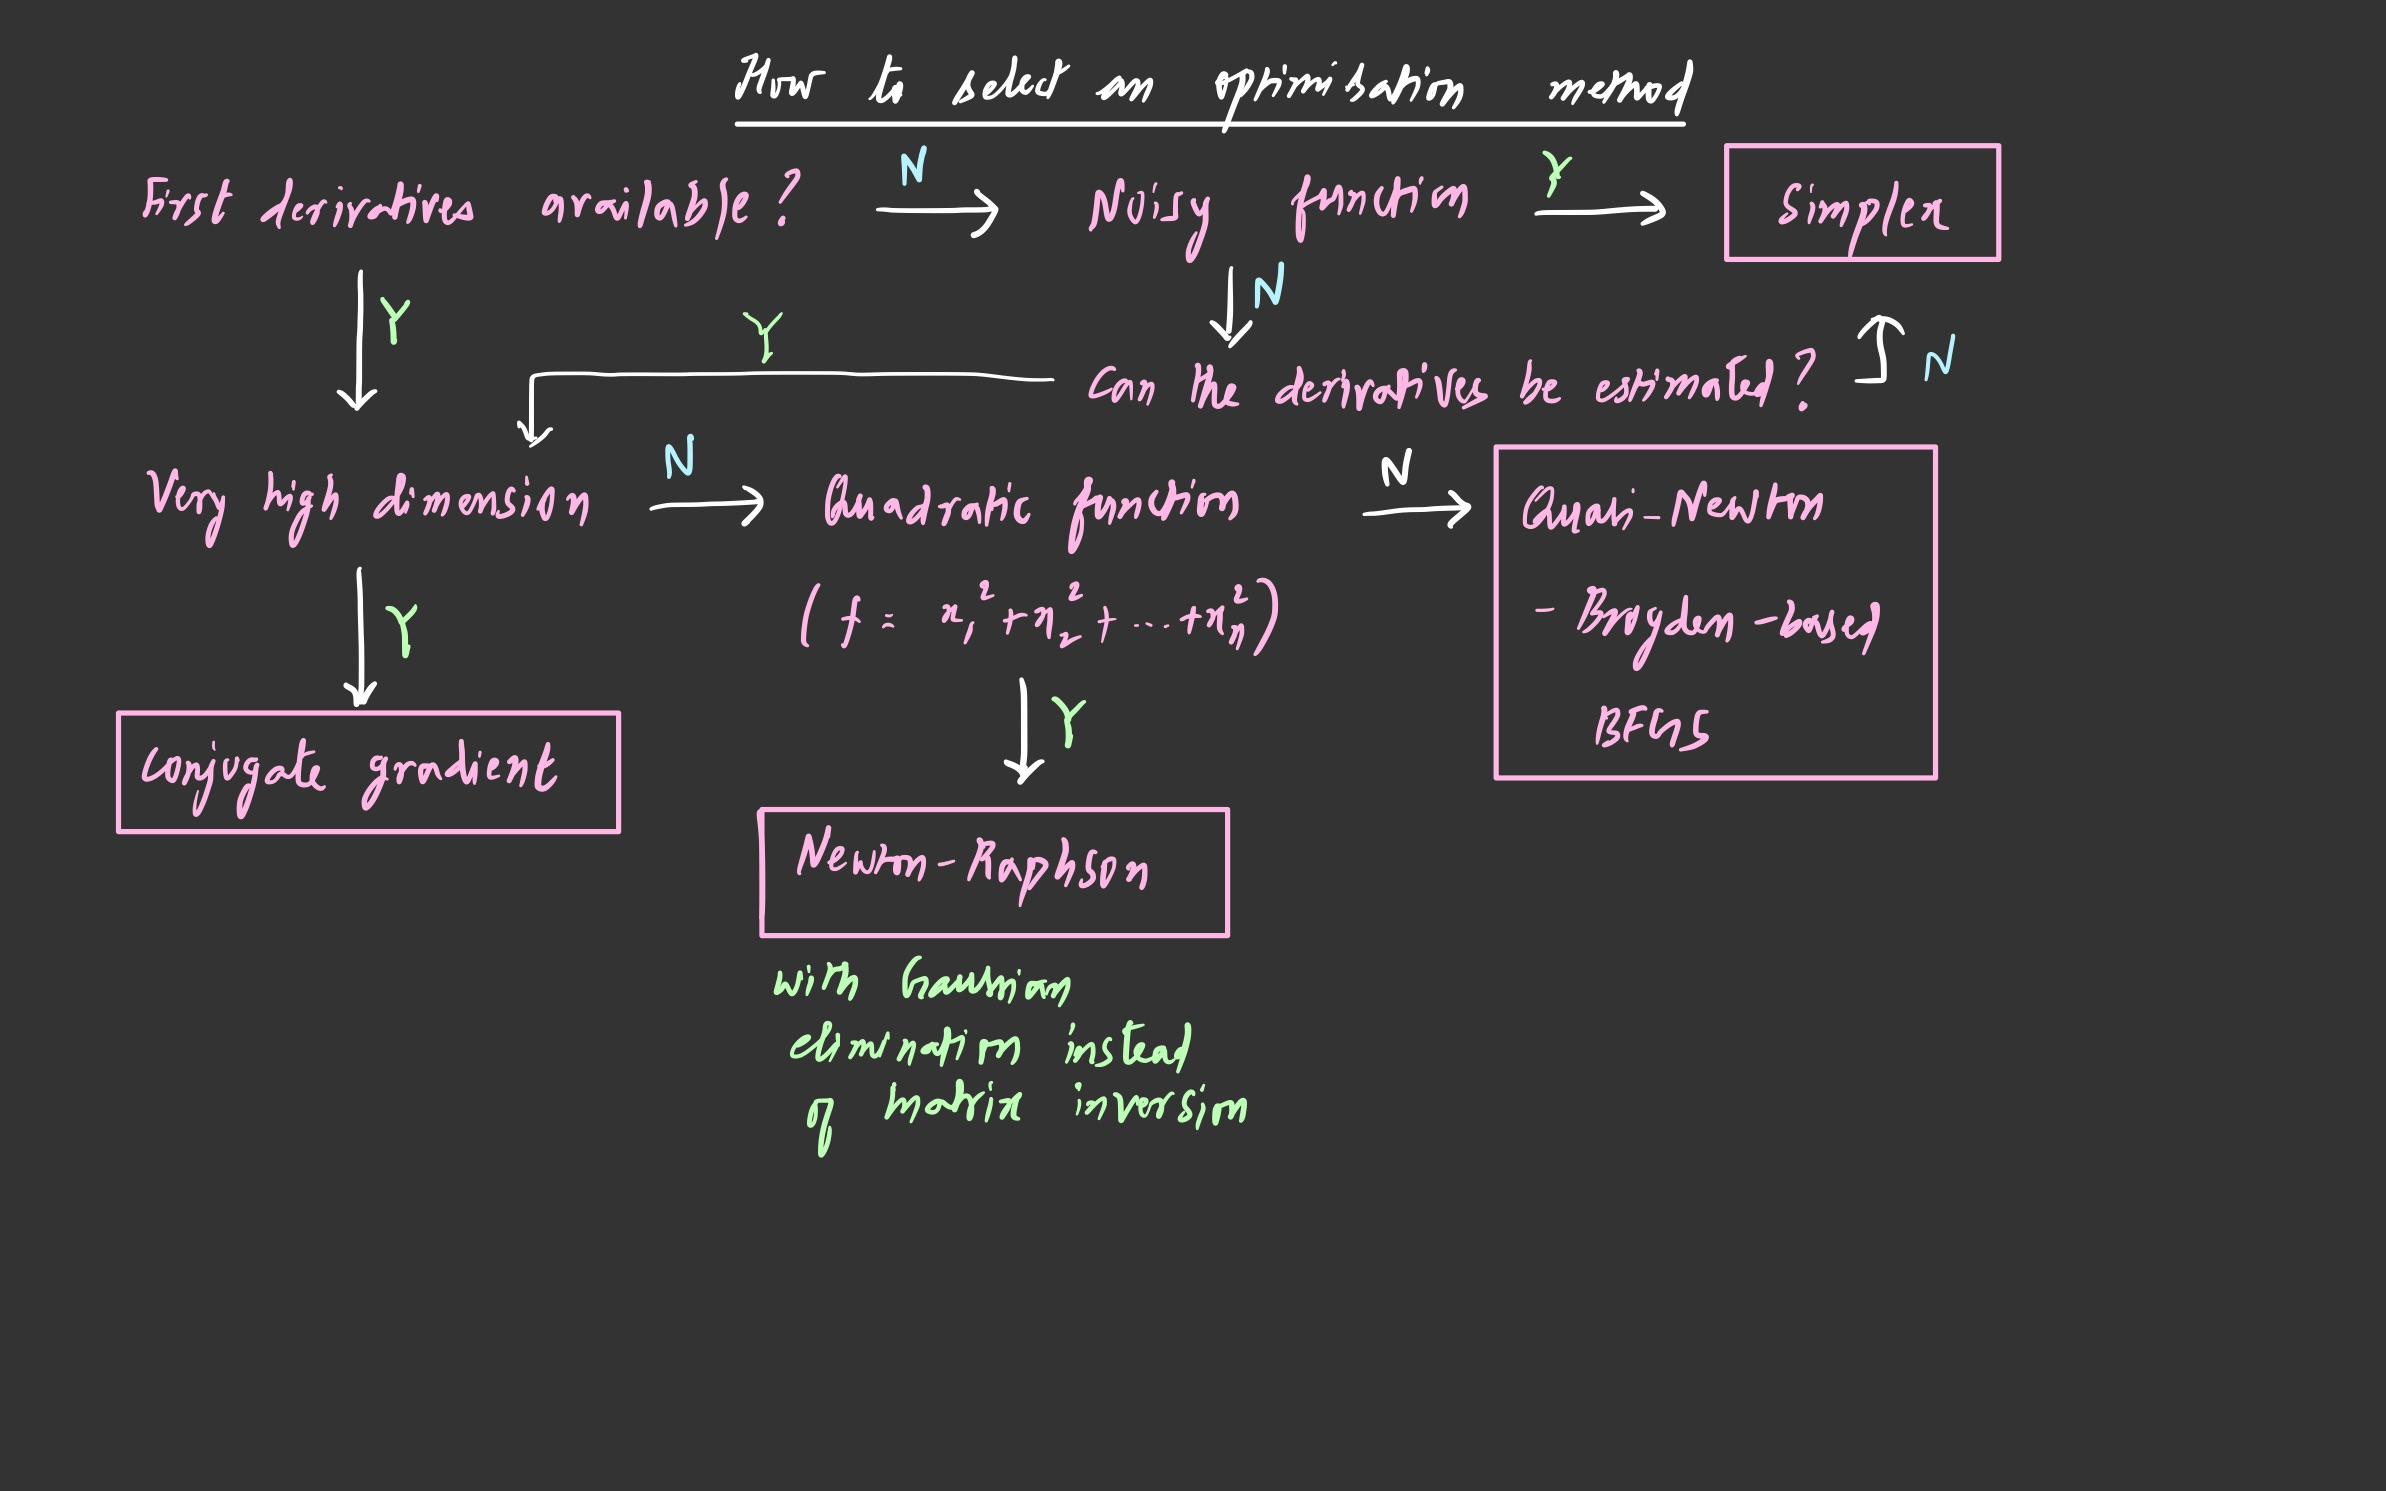

In [18]:
Image(filename='../boardwork/boardwork093.jpg') 